<a href="https://colab.research.google.com/github/UFM-Market-Trends/UFM-Market-Trends-SDK/blob/main/examples/1_Actividad_Econ%C3%B3mica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Actividad Económica

## PIB

In [1]:
!pip install pyxlsb
!pip install git+https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git
!pip install openpyxl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import ufmtrends_sdk as trends
today = datetime.date.today().strftime("%Y-%m-%d")

  Cloning https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git to /tmp/pip-req-build-8wwq8buv
  Running command git clone --filter=blob:none --quiet https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git /tmp/pip-req-build-8wwq8buv
  Resolved https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git to commit 84ad758292decb2329627e48861c02815d4ee875
  Preparing metadata (setup.py) ... done


In [2]:
# "PIB - Gráficas y Cuadros Estadísticos"
gdp_url = "https://www.banguat.gob.gt/sites/default/files/banguat/cuentasnac/PIB2013/CNT_cuadros_al_2T_2022.xlsx"

gdp_sheet_name=2
gdp_skip_rows = range(6) # Ignorar 5 filas del encabezado (range/array parameter)
gdp_skip_footer = 3 # Ignorar 3 líneas del pie de página (int parameter)

gdp_quarterly_df = pd.read_excel(gdp_url,
                              sheet_name=gdp_sheet_name,
                              skiprows=gdp_skip_rows,
                              skipfooter=gdp_skip_footer#, engine='pyxlsb'
                              )
gdp_quarterly_df

,Unnamed: 0,"Agricultura, ganadería, silvicultura y pesca",Explotación de minas y canteras,Industrias manufac-tureras,"Suministro de electricidad, agua y saneamiento",Construcción,Comercio y reparación de vehículos,Transporte y almacena-miento,Actividades de alojamiento y de servicio de comidas,Información y comunica-ciones,Actividades financieras y de seguros,Actividades inmobiliarias,Actividades profesionales científicas y técnicas,Actividades de servicios administra-tivos y de apoyo,Administra-ción pública y defensa,Enseñanza,Salud,Otras actividades de servicios,Unnamed: 18,Unnamed: 19
0,2013,43121.567406,5826.657290,60027.565965,11882.625338,17835.379315,76016.418827,11073.502787,11492.266437,19122.512458,14001.805665,36214.018649,10343.146235,14549.231476,16754.245456,17803.140932,9168.439483,16785.644483,24365.052097,416383.220300
1,I,11792.499167,1407.787650,15495.148109,2773.984580,4023.935448,18792.234736,2759.519358,2668.312319,4453.354513,3583.448419,8891.307310,2415.642827,3671.056195,4103.007621,5001.914565,2142.725556,3982.765672,5999.532995,103958.177041
2,II,10682.737287,1386.486539,15079.097625,2720.630726,4557.184138,18892.967998,2760.653614,2806.915360,4773.785665,3444.294524,9007.975541,2564.516381,3556.163593,4179.855094,4338.411601,2279.801889,4176.351949,5992.781890,103200.611412
3,III,10019.281817,1388.907769,14215.795354,3045.929711,4518.355164,18889.019635,2669.338953,2870.930010,4682.320570,3465.658497,9077.427287,2530.714098,3361.200540,4216.779916,4609.528152,2403.673587,4369.124476,6037.997099,102371.982635
4,IV,10627.049135,1643.475332,15237.524878,3342.080321,4735.904565,19442.196458,2883.990862,3146.108747,5213.051710,3508.404226,9237.308512,2832.272930,3960.811147,4254.602825,3853.286615,2342.238451,4257.402385,6334.740113,106852.449212
5,2014,43813.823063,8543.029384,62080.379312,12657.267568,19164.318199,78725.541412,11627.188715,12093.455716,19374.021728,14647.059124,37718.158163,10821.726434,15354.687911,17388.401085,18285.929177,10016.415009,17321.198913,25254.597452,434887.198365
6,I,11960.549375,1895.262414,15848.771631,3132.539318,4481.214111,19244.088931,2861.181210,2752.165659,4655.294485,3762.581439,9260.927958,2589.611135,3830.753370,4217.771867,5049.360088,2387.519336,4187.486969,6168.197099,108285.276395
7,II,10830.842967,2112.369926,15494.749898,3078.535089,4770.463476,19355.896067,2890.757416,2984.046243,4843.714866,3561.283631,9397.572861,2651.843845,3791.055265,4359.304221,4498.358981,2448.540168,4470.763392,6110.723855,107650.822167
8,III,10229.309899,2343.778044,14738.326235,2963.109524,4820.649974,19550.248236,2837.892161,3015.683943,4750.058833,3592.400021,9446.941070,2629.767799,3645.439668,4368.999930,4729.042379,2561.046444,4323.547959,6239.874524,106786.116643
9,IV,10793.120822,2191.618999,15998.531548,3483.083637,5091.990637,20575.308178,3037.357929,3341.559872,5124.953544,3730.794033,9612.716274,2950.503654,4087.439608,4442.325068,4009.167728,2619.309061,4339.400593,6735.801974,112164.983160


In [3]:
'''
(En general, Banguat mantiene un formato  consistente. Aún así, como analistas hemos de tener 
la máxima diligencia en verificar que así sea siempre).
'''
# Agricultura, ganadería, silvicultura y pesca
AGRICULTURE = "Agricultura"
# Explotación de minas y canteras
MINES = "Minas y canteras"
# Industrias manufactureras
MANUFACTURE = "Manufactura"
# Suministro de electricidad, agua y saneamiento
WATER_AND_ELECTRICITY = "Agua y electricidad"
# Construcción
CONSTRUCTION = "Construcción"
# Comercio y reparación de vehículos
COMMERCE = "Comercio"
# Transporte y almacenamiento
TRANSPORT = "Transporte y almacenamiento"
# Actividades de alojamiento y servicio de comidas
HOTELS_AND_RESTAURANTS = "Hoteles y restaurantes"
# Información y comunicaciones
COMMUNICATIONS = "Información y comunicaciones"
# Actividades financieras y de seguros
FINANCE = "Actividades financieras y de seguros"
# Actividades inmobiliarias
REAL_STATE = "Actividades inmobiliarias"
# Actividades profesionales, científicas y técnicas
PROFESSIONAL_ACTIVITIES = "Actividades profesionales"
# Actividades de servicios administrativos y de apoyo
ADMINISTRATION_SERVICES = "Administración y servicios"
# Administración pública y defensa
PUBLIC_ADMINISTRATION = "Sector público"
# Enseñanza
EDUCATION = "Educación"
# Salud
HEALTH_CARE = "Salud"
# Otras actividades de servicios
OTHER_ACTIVITIES = "Otras actividades"

# Impuestos netos de subvenciones a los productos
NET_SUBSIDY_TAXES = "Impuestos de subvenciones"
# PIB Trimestral
GDP = "PIB"

gdp_columns = ['date', AGRICULTURE, MINES, MANUFACTURE, WATER_AND_ELECTRICITY, CONSTRUCTION,
           COMMERCE, TRANSPORT, HOTELS_AND_RESTAURANTS, COMMUNICATIONS, 
           FINANCE, REAL_STATE, PROFESSIONAL_ACTIVITIES, ADMINISTRATION_SERVICES,
           PUBLIC_ADMINISTRATION, EDUCATION, HEALTH_CARE, OTHER_ACTIVITIES,
           NET_SUBSIDY_TAXES, GDP]

gdp_quarterly_df.columns = gdp_columns
gdp_quarterly_df.head()

,date,Agricultura,Minas y canteras,Manufactura,Agua y electricidad,Construcción,Comercio,Transporte y almacenamiento,Hoteles y restaurantes,Información y comunicaciones,Actividades financieras y de seguros,Actividades inmobiliarias,Actividades profesionales,Administración y servicios,Sector público,Educación,Salud,Otras actividades,Impuestos de subvenciones,PIB
0,2013,43121.567406,5826.657290,60027.565965,11882.625338,17835.379315,76016.418827,11073.502787,11492.266437,19122.512458,14001.805665,36214.018649,10343.146235,14549.231476,16754.245456,17803.140932,9168.439483,16785.644483,24365.052097,416383.220300
1,I,11792.499167,1407.787650,15495.148109,2773.984580,4023.935448,18792.234736,2759.519358,2668.312319,4453.354513,3583.448419,8891.307310,2415.642827,3671.056195,4103.007621,5001.914565,2142.725556,3982.765672,5999.532995,103958.177041
2,II,10682.737287,1386.486539,15079.097625,2720.630726,4557.184138,18892.967998,2760.653614,2806.915360,4773.785665,3444.294524,9007.975541,2564.516381,3556.163593,4179.855094,4338.411601,2279.801889,4176.351949,5992.781890,103200.611412
3,III,10019.281817,1388.907769,14215.795354,3045.929711,4518.355164,18889.019635,2669.338953,2870.930010,4682.320570,3465.658497,9077.427287,2530.714098,3361.200540,4216.779916,4609.528152,2403.673587,4369.124476,6037.997099,102371.982635
4,IV,10627.049135,1643.475332,15237.524878,3342.080321,4735.904565,19442.196458,2883.990862,3146.108747,5213.051710,3508.404226,9237.308512,2832.272930,3960.811147,4254.602825,3853.286615,2342.238451,4257.402385,6334.740113,106852.449212


In [4]:
# Recurso opcional de referencia:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

# Queremos un dataframe con  cifras trimestrales, no anuales.
year_rows = np.arange(start=0,stop=len(gdp_quarterly_df["date"]),step=5)
gdp_quarterly_df = gdp_quarterly_df.drop(year_rows)

# Reset index
# https://stackoverflow.com/questions/33165734/update-index-after-sorting-data-frame
gdp_quarterly_df = gdp_quarterly_df.reset_index(drop=True) 

gdp_quarterly_df

,date,Agricultura,Minas y canteras,Manufactura,Agua y electricidad,Construcción,Comercio,Transporte y almacenamiento,Hoteles y restaurantes,Información y comunicaciones,Actividades financieras y de seguros,Actividades inmobiliarias,Actividades profesionales,Administración y servicios,Sector público,Educación,Salud,Otras actividades,Impuestos de subvenciones,PIB
0,I,11792.499167,1407.787650,15495.148109,2773.984580,4023.935448,18792.234736,2759.519358,2668.312319,4453.354513,3583.448419,8891.307310,2415.642827,3671.056195,4103.007621,5001.914565,2142.725556,3982.765672,5999.532995,103958.177041
1,II,10682.737287,1386.486539,15079.097625,2720.630726,4557.184138,18892.967998,2760.653614,2806.915360,4773.785665,3444.294524,9007.975541,2564.516381,3556.163593,4179.855094,4338.411601,2279.801889,4176.351949,5992.781890,103200.611412
2,III,10019.281817,1388.907769,14215.795354,3045.929711,4518.355164,18889.019635,2669.338953,2870.930010,4682.320570,3465.658497,9077.427287,2530.714098,3361.200540,4216.779916,4609.528152,2403.673587,4369.124476,6037.997099,102371.982635
3,IV,10627.049135,1643.475332,15237.524878,3342.080321,4735.904565,19442.196458,2883.990862,3146.108747,5213.051710,3508.404226,9237.308512,2832.272930,3960.811147,4254.602825,3853.286615,2342.238451,4257.402385,6334.740113,106852.449212
4,I,11960.549375,1895.262414,15848.771631,3132.539318,4481.214111,19244.088931,2861.181210,2752.165659,4655.294485,3762.581439,9260.927958,2589.611135,3830.753370,4217.771867,5049.360088,2387.519336,4187.486969,6168.197099,108285.276395
5,II,10830.842967,2112.369926,15494.749898,3078.535089,4770.463476,19355.896067,2890.757416,2984.046243,4843.714866,3561.283631,9397.572861,2651.843845,3791.055265,4359.304221,4498.358981,2448.540168,4470.763392,6110.723855,107650.822167
6,III,10229.309899,2343.778044,14738.326235,2963.109524,4820.649974,19550.248236,2837.892161,3015.683943,4750.058833,3592.400021,9446.941070,2629.767799,3645.439668,4368.999930,4729.042379,2561.046444,4323.547959,6239.874524,106786.116643
7,IV,10793.120822,2191.618999,15998.531548,3483.083637,5091.990637,20575.308178,3037.357929,3341.559872,5124.953544,3730.794033,9612.716274,2950.503654,4087.439608,4442.325068,4009.167728,2619.309061,4339.400593,6735.801974,112164.983160
8,I,12180.295376,2384.806199,16461.349804,3196.264889,4684.655221,19982.787655,2931.510941,3001.992620,4760.968680,3991.093564,9658.715395,2762.837716,4179.037556,4454.071354,5124.109433,2594.664232,4361.586783,6660.889015,113342.610277
9,II,10993.792582,2071.261210,15916.926479,2974.043021,4647.011437,20076.457162,2958.337871,3120.406010,4897.940726,3882.843859,9750.969645,2806.995324,4009.228433,4521.267258,4571.087482,2586.606668,4574.194256,6651.256994,111019.822667


In [5]:
# Recurso opcional de referencia: 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

# Año 2013 (S2 2020 requirió 2014; Banguat mejoró archivo en 2021)
start_year = 2013 

start_date = datetime.datetime(year=start_year, 
                               month=1, 
                               day=1) # Fecha 2014-1-1

quarters_amount = len(gdp_quarterly_df["date"]) # trimestres hasta el presente
quarters = pd.period_range(start_date, periods=quarters_amount, freq='Q')

# https://stackoverflow.com/questions/53898482/clean-way-to-convert-quarterly-periods-to-datetime-in-pandas
gdp_quarterly_df["date"] = pd.PeriodIndex(quarters, freq='Q').to_timestamp()
#  Puede ser útil el formato 20##Q#
gdp_quarterly_df.insert(loc=1, column="quarter", value=quarters, allow_duplicates=True) 

gdp_quarterly_df

,date,quarter,Agricultura,Minas y canteras,Manufactura,Agua y electricidad,Construcción,Comercio,Transporte y almacenamiento,Hoteles y restaurantes,...,Actividades financieras y de seguros,Actividades inmobiliarias,Actividades profesionales,Administración y servicios,Sector público,Educación,Salud,Otras actividades,Impuestos de subvenciones,PIB
0,2013-01-01,2013Q1,11792.499167,1407.787650,15495.148109,2773.984580,4023.935448,18792.234736,2759.519358,2668.312319,...,3583.448419,8891.307310,2415.642827,3671.056195,4103.007621,5001.914565,2142.725556,3982.765672,5999.532995,103958.177041
1,2013-04-01,2013Q2,10682.737287,1386.486539,15079.097625,2720.630726,4557.184138,18892.967998,2760.653614,2806.915360,...,3444.294524,9007.975541,2564.516381,3556.163593,4179.855094,4338.411601,2279.801889,4176.351949,5992.781890,103200.611412
2,2013-07-01,2013Q3,10019.281817,1388.907769,14215.795354,3045.929711,4518.355164,18889.019635,2669.338953,2870.930010,...,3465.658497,9077.427287,2530.714098,3361.200540,4216.779916,4609.528152,2403.673587,4369.124476,6037.997099,102371.982635
3,2013-10-01,2013Q4,10627.049135,1643.475332,15237.524878,3342.080321,4735.904565,19442.196458,2883.990862,3146.108747,...,3508.404226,9237.308512,2832.272930,3960.811147,4254.602825,3853.286615,2342.238451,4257.402385,6334.740113,106852.449212
4,2014-01-01,2014Q1,11960.549375,1895.262414,15848.771631,3132.539318,4481.214111,19244.088931,2861.181210,2752.165659,...,3762.581439,9260.927958,2589.611135,3830.753370,4217.771867,5049.360088,2387.519336,4187.486969,6168.197099,108285.276395
5,2014-04-01,2014Q2,10830.842967,2112.369926,15494.749898,3078.535089,4770.463476,19355.896067,2890.757416,2984.046243,...,3561.283631,9397.572861,2651.843845,3791.055265,4359.304221,4498.358981,2448.540168,4470.763392,6110.723855,107650.822167
6,2014-07-01,2014Q3,10229.309899,2343.778044,14738.326235,2963.109524,4820.649974,19550.248236,2837.892161,3015.683943,...,3592.400021,9446.941070,2629.767799,3645.439668,4368.999930,4729.042379,2561.046444,4323.547959,6239.874524,106786.116643
7,2014-10-01,2014Q4,10793.120822,2191.618999,15998.531548,3483.083637,5091.990637,20575.308178,3037.357929,3341.559872,...,3730.794033,9612.716274,2950.503654,4087.439608,4442.325068,4009.167728,2619.309061,4339.400593,6735.801974,112164.983160
8,2015-01-01,2015Q1,12180.295376,2384.806199,16461.349804,3196.264889,4684.655221,19982.787655,2931.510941,3001.992620,...,3991.093564,9658.715395,2762.837716,4179.037556,4454.071354,5124.109433,2594.664232,4361.586783,6660.889015,113342.610277
9,2015-04-01,2015Q2,10993.792582,2071.261210,15916.926479,2974.043021,4647.011437,20076.457162,2958.337871,3120.406010,...,3882.843859,9750.969645,2806.995324,4009.228433,4521.267258,4571.087482,2586.606668,4574.194256,6651.256994,111019.822667


In [6]:
gdp_yearly_df = gdp_quarterly_df.copy() #IMPORTANT!!!
gdp_yearly_df.iloc[:,2:] = gdp_quarterly_df.iloc[:,2:].transform(trends.get_yearly_values)
gdp_yearly_df

,date,quarter,Agricultura,Minas y canteras,Manufactura,Agua y electricidad,Construcción,Comercio,Transporte y almacenamiento,Hoteles y restaurantes,...,Actividades financieras y de seguros,Actividades inmobiliarias,Actividades profesionales,Administración y servicios,Sector público,Educación,Salud,Otras actividades,Impuestos de subvenciones,PIB
0,2013-01-01,2013Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-04-01,2013Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-07-01,2013Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-10-01,2013Q4,43121.567406,5826.657290,60027.565965,11882.625338,17835.379315,76016.418827,11073.502787,11492.266437,...,14001.805665,36214.018649,10343.146235,14549.231476,16754.245456,17803.140932,9168.439483,16785.644483,24365.052097,416383.220300
4,2014-01-01,2014Q1,43289.617615,6314.132055,60381.189486,12241.180076,18292.657978,76468.273022,11175.164639,11576.119776,...,14180.938685,36583.639297,10517.114544,14708.928651,16869.009701,17850.586456,9413.233263,16990.365779,24533.716201,420710.319653
5,2014-04-01,2014Q2,43437.723295,7040.015442,60796.841760,12599.084438,18505.937317,76931.201090,11305.268440,11753.250659,...,14297.927792,36973.236617,10604.442008,14943.820322,17048.458828,18010.533836,9581.971543,17284.777222,24651.658166,425160.530408
6,2014-07-01,2014Q3,43647.751377,7994.885717,61319.372641,12516.264251,18808.232127,77592.429691,11473.821648,11898.004592,...,14424.669316,37342.750400,10703.495710,15228.059450,17200.678842,18130.048063,9739.344399,17239.200705,24853.535591,429574.664416
7,2014-10-01,2014Q4,43813.823063,8543.029384,62080.379312,12657.267568,19164.318199,78725.541412,11627.188715,12093.455716,...,14647.059124,37718.158163,10821.726434,15354.687911,17388.401085,18285.929177,10016.415009,17321.198913,25254.597452,434887.198365
8,2015-01-01,2015Q1,44033.569064,9032.573168,62692.957485,12720.993139,19367.759309,79464.240136,11697.518446,12343.282677,...,14875.571249,38115.945600,10994.953015,15702.972096,17624.700573,18360.678522,10223.559905,17495.298727,25747.289368,439944.532247
9,2015-04-01,2015Q2,44196.518679,8991.464452,63115.134065,12616.501071,19244.307270,80184.801231,11765.098901,12479.642445,...,15197.131478,38469.342384,11150.104493,15921.145265,17786.663610,18433.407024,10361.626405,17598.729591,26287.822506,443313.532748


In [ ]:
# https://colab.research.google.com/notebooks/snippets/gcs.ipynb
# from google.colab import auth
# auth.authenticate_user()


# https://cloud.google.com/vertex-ai/docs/workbench/managed/authentication

# We're now using Vertex AI notebooks in GCloud so authentication is not needed.
# Default project is set to be already ufm-market-trends
# project_id = 'ufm-market-trends'
# !gcloud config set project {project_id}

In [7]:
gdp_yearly_csv = "PIB-Acum-4-Trimestres.csv"
gdp_yearly_df[3:].to_csv(gdp_yearly_csv, index=False)

In [8]:
bucket_path = 'ufm-market-trends/guatemala/actividad-economica/PIB'
csv_file = gdp_yearly_csv

!gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
!gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}  
!gsutil cat gs://{bucket_path}/{csv_file}

Copying file://PIB-Acum-4-Trimestres.csv [Content-Type=text/csv]...
/ [1 files][ 13.0 KiB/ 13.0 KiB]                                                
Operation completed over 1 objects/13.0 KiB.                                     
Copying gs://ufm-market-trends/guatemala/actividad-economica/PIB/PIB-Acum-4-Trimestres.csv [Content-Type=text/csv]...
/ [1 files][ 13.0 KiB/ 13.0 KiB]                                                
Operation completed over 1 objects/13.0 KiB.                                     
date,quarter,Agricultura,Minas y canteras,Manufactura,Agua y electricidad,Construcción,Comercio,Transporte y almacenamiento,Hoteles y restaurantes,Información y comunicaciones,Actividades financieras y de seguros,Actividades inmobiliarias,Actividades profesionales,Administración y servicios,Sector público,Educación,Salud,Otras actividades,Impuestos de subvenciones,PIB
2013-10-01,2013Q4,43121.567406,5826.657290000001,60027.565965,11882.62533764833,17835.37931540564,76016.41882699999,1

In [9]:
gdp_composition_df = gdp_yearly_df.copy()[-1:].iloc[:,2:]/float(gdp_yearly_df[-1:][GDP])
gdp_composition_df

,Agricultura,Minas y canteras,Manufactura,Agua y electricidad,Construcción,Comercio,Transporte y almacenamiento,Hoteles y restaurantes,Información y comunicaciones,Actividades financieras y de seguros,Actividades inmobiliarias,Actividades profesionales,Administración y servicios,Sector público,Educación,Salud,Otras actividades,Impuestos de subvenciones,PIB
37,0.093354,0.007625,0.142688,0.027869,0.044774,0.184814,0.024893,0.027768,0.047926,0.041854,0.090723,0.024662,0.035836,0.038374,0.035994,0.027073,0.036397,0.063942,1.0


In [10]:
gdp_composition_csv = 'PIB-Composicion.csv'
gdp_composition_df.iloc[:,:-1].to_csv(gdp_composition_csv, index=False)

In [11]:
bucket_path = 'ufm-market-trends/guatemala/actividad-economica/PIB-Composicion'
csv_file = gdp_composition_csv

!gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
!gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}  
!gsutil cat gs://{bucket_path}/{csv_file}

Copying file://PIB-Composicion.csv [Content-Type=text/csv]...
/ [1 files][  722.0 B/  722.0 B]                                                
Operation completed over 1 objects/722.0 B.                                      
Copying gs://ufm-market-trends/guatemala/actividad-economica/PIB-Composicion/PIB-Composicion.csv [Content-Type=text/csv]...
/ [1 files][  722.0 B/  722.0 B]                                                
Operation completed over 1 objects/722.0 B.                                      
Agricultura,Minas y canteras,Manufactura,Agua y electricidad,Construcción,Comercio,Transporte y almacenamiento,Hoteles y restaurantes,Información y comunicaciones,Actividades financieras y de seguros,Actividades inmobiliarias,Actividades profesionales,Administración y servicios,Sector público,Educación,Salud,Otras actividades,Impuestos de subvenciones
0.09335359228036931,0.007624646168813121,0.14268778170202281,0.02786900168758534,0.044773541686909266,0.18481390473780393,0.0248933154

In [12]:
gdp_yearly_variation_df = gdp_quarterly_df.copy()
# THIS LINE IS WRONG.
gdp_yearly_variation_df.iloc[:, 2:] = gdp_yearly_variation_df.iloc[:, 2:].transform(lambda x: trends.get_accumulated_variation(x,4))
gdp_yearly_variation_df.iloc[:, 2:] *= 100
# Media
gdp_yearly_variation_df['Media desde 2014'] = np.mean(gdp_yearly_variation_df[GDP])
GDP_GROWTH = 'Crecimiento PIB'
gdp_yearly_variation_df.rename(columns={GDP: GDP_GROWTH}, inplace=True)
gdp_yearly_variation_df

,date,quarter,Agricultura,Minas y canteras,Manufactura,Agua y electricidad,Construcción,Comercio,Transporte y almacenamiento,Hoteles y restaurantes,...,Actividades inmobiliarias,Actividades profesionales,Administración y servicios,Sector público,Educación,Salud,Otras actividades,Impuestos de subvenciones,Crecimiento PIB,Media desde 2014
0,2013-01-01,2013Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.455359
1,2013-04-01,2013Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.455359
2,2013-07-01,2013Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.455359
3,2013-10-01,2013Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.455359
4,2014-01-01,2014Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.455359
5,2014-04-01,2014Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.455359
6,2014-07-01,2014Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.455359
7,2014-10-01,2014Q4,1.605358,46.619733,3.419784,6.519117,7.451139,3.563865,5.000097,5.231251,...,4.153473,4.627027,5.536075,3.785044,2.711815,9.248853,3.190550,3.650907,4.443978,3.455359
8,2015-01-01,2015Q1,1.718545,43.053283,3.828623,3.919663,5.877229,3.917922,4.674238,6.627116,...,4.188502,4.543437,6.758096,4.479758,2.857565,8.608377,2.971878,4.946553,4.571842,3.455359
9,2015-04-01,2015Q2,1.746858,27.719385,3.813179,0.138237,3.989908,4.229234,4.067400,6.180348,...,4.046456,5.145603,6.539994,4.330038,2.347921,8.136685,1.816352,6.637137,4.269682,3.455359


In [13]:
# gdp_dataframe["yearly_gdp"] = trends.get_yearly_values(quarterly_values=gdp_dataframe.quarterly_gdp)
# gdp_dataframe["yearly_gdp_variation"] = trends.get_yearly_variation(quarterly_values=gdp_dataframe.quarterly_gdp)
# gdp_dataframe.yearly_gdp_variation *= 100
# gdp_dataframe.iloc[-5:]

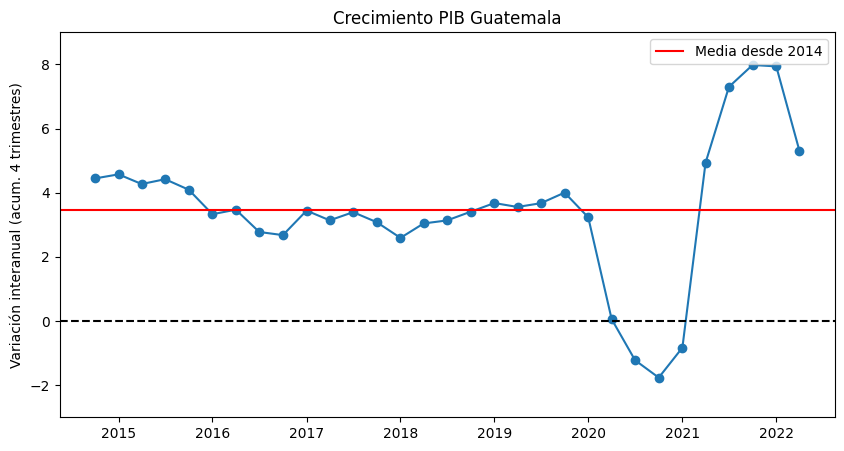

In [14]:
plt.figure(figsize=(10,5))
plt.plot_date(x=gdp_yearly_variation_df["date"][7:],
              y=gdp_yearly_variation_df[GDP_GROWTH][7:],
              linestyle='-')
# plt.ylim(-0.03, 0.08)
plt.ylim(-3,9)
plt.ylabel("Variación interanual (acum. 4 trimestres)")
plt.title("Crecimiento PIB Guatemala")
plt.axhline(np.mean(gdp_yearly_variation_df[GDP_GROWTH][7:]), 
            color="red", label="Media desde 2014")
plt.axhline(0, color="black", linestyle="--")
plt.legend()
plt.show()

In [15]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
# ["quarter"].astype(str)[7:]
# gdp_dataframe['yearly_gdp_variation'][7:].tolist()
gdp_variation_csv = 'PIB-base-2013-variacion-interanual-acum-4-trimestres.csv'
gdp_yearly_variation_df[7:].to_csv(gdp_variation_csv, index=False)

In [16]:
bucket_path = 'ufm-market-trends/guatemala/actividad-economica/PIB-variacion'
csv_file = gdp_variation_csv
# Copy the file to our new bucket.
# Full reference: https://cloud.google.com/storage/docs/gsutil/commands/cp
!gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
!gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}
  
# Finally, dump the contents of our newly copied file to make sure everything worked.
!gsutil cat gs://{bucket_path}/{csv_file}

Copying file://PIB-base-2013-variacion-interanual-acum-4-trimestres.csv [Content-Type=text/csv]...
/ [1 files][ 12.1 KiB/ 12.1 KiB]                                                
Operation completed over 1 objects/12.1 KiB.                                     
Copying gs://ufm-market-trends/guatemala/actividad-economica/PIB-variacion/PIB-base-2013-variacion-interanual-acum-4-trimestres.csv [Content-Type=text/csv]...
/ [1 files][ 12.1 KiB/ 12.1 KiB]                                                
Operation completed over 1 objects/12.1 KiB.                                     
date,quarter,Agricultura,Minas y canteras,Manufactura,Agua y electricidad,Construcción,Comercio,Transporte y almacenamiento,Hoteles y restaurantes,Información y comunicaciones,Actividades financieras y de seguros,Actividades inmobiliarias,Actividades profesionales,Administración y servicios,Sector público,Educación,Salud,Otras actividades,Impuestos de subvenciones,Crecimiento PIB,Media desde 2014
2014-10-01,2014Q

In [17]:
datetime.date.today().strftime("%b-%d-%Y")

'Jan-06-2023'

```json
[
    {
      "origin": ["ORIGIN"],
      "method": ["METHOD"],
      "responseHeader": ["HEADER"],
      "maxAgeSeconds": MAX-AGE
    }
]
```

In [18]:
# https://academy.datawrapper.de/article/60-external-data-sources
# https://cloud.google.com/storage/docs/gsutil/commands/cors
# https://cloud.google.com/storage/docs/gsutil/addlhelp/WorkingWithObjectMetadata#cache-control
# https://cloud.google.com/storage/docs/gsutil/addlhelp/WorkingWithObjectMetadata#cache-control

In [19]:
%%writefile cors.json
[
    {
      "origin": ["https://datawrapper.dwcdn.net/"],
      "method": ["GET"],
      "responseHeader": ["Access-Control-Allow-Origin"],
      "maxAgeSeconds": 1
    }
]

Writing cors.json


In [20]:
!gsutil cors set cors.json gs://ufm-market-trends

Setting CORS on gs://ufm-market-trends/...


In [21]:
# https://cloud.google.com/storage/docs/configuring-cors#gsutil
!gsutil cors get gs://ufm-market-trends

[{"maxAgeSeconds": 1, "method": ["GET"], "origin": ["https://datawrapper.dwcdn.net/"], "responseHeader": ["Access-Control-Allow-Origin"]}]


In [22]:
# !gsutil ls -L gs://{bucket_path}/{gdp_csv}

In [23]:
all_sectors = [AGRICULTURE, MINES, MANUFACTURE, WATER_AND_ELECTRICITY, CONSTRUCTION,
           COMMERCE, TRANSPORT, HOTELS_AND_RESTAURANTS, COMMUNICATIONS, 
           FINANCE, REAL_STATE, PROFESSIONAL_ACTIVITIES, ADMINISTRATION_SERVICES,
           ADMINISTRATION_SERVICES, EDUCATION, HEALTH_CARE, OTHER_ACTIVITIES]

In [24]:
growing_rates = dict()

for sector in all_sectors:
  growing_rates[sector] = gdp_yearly_variation_df[sector].to_list()[-1]

growing_rates["Economía total"] = gdp_yearly_variation_df[GDP_GROWTH].to_list()[-1]
print(growing_rates)

{'Agricultura': 3.493401078074701, 'Minas y canteras': 1.0558473284052168, 'Manufactura': 4.4115673910609905, 'Agua y electricidad': 4.644092515909044, 'Construcción': 6.036152041178673, 'Comercio': 5.051013004160603, 'Transporte y almacenamiento': 10.23607801863406, 'Hoteles y restaurantes': 17.02832487266895, 'Información y comunicaciones': 2.695819866271708, 'Actividades financieras y de seguros': 7.048971882156145, 'Actividades inmobiliarias': 5.07199530876941, 'Actividades profesionales': 7.544912215409891, 'Administración y servicios': 8.568141122272593, 'Educación': 2.7453669078240743, 'Salud': 8.326611067537403, 'Otras actividades': 5.440266443001008, 'Economía total': 5.306286877311614}


In [25]:
# Recurso opcional de referencia:
# https://stackoverflow.com/questions/7197315/5-maximum-values-in-a-python-dictionary
# https://www.geeksforgeeks.org/python-program-to-count-positive-and-negative-numbers-in-a-list/

pos_count, neg_count = 0, 0
for rate in growing_rates.values(): 
    # if rate >= 0: pos_count += 1
    if rate >= growing_rates["Economía total"]: pos_count += 1
    else: neg_count += 1

# Por la economía total (queremos que salga en ambas), 
# aún añadimos 1 a neg_count
neg_count += 1

# Sectores con mayor crecimiento (tasas positivas)
highest_growing_sectors = sorted(growing_rates, 
                                 key=growing_rates.get, 
                                 reverse=True)[:pos_count]

# Sectores con menor crecimiento (tasas negativas)
least_growing_sectors = sorted(growing_rates, 
                               key=growing_rates.get, 
                               reverse=False)[:neg_count]

print('highest_growing_sectors', highest_growing_sectors)
print('least_growing_sectors', least_growing_sectors)

highest_growing_sectors ['Hoteles y restaurantes', 'Transporte y almacenamiento', 'Administración y servicios', 'Salud', 'Actividades profesionales', 'Actividades financieras y de seguros', 'Construcción', 'Otras actividades', 'Economía total']
least_growing_sectors ['Minas y canteras', 'Información y comunicaciones', 'Educación', 'Agricultura', 'Manufactura', 'Agua y electricidad', 'Comercio', 'Actividades inmobiliarias', 'Economía total']


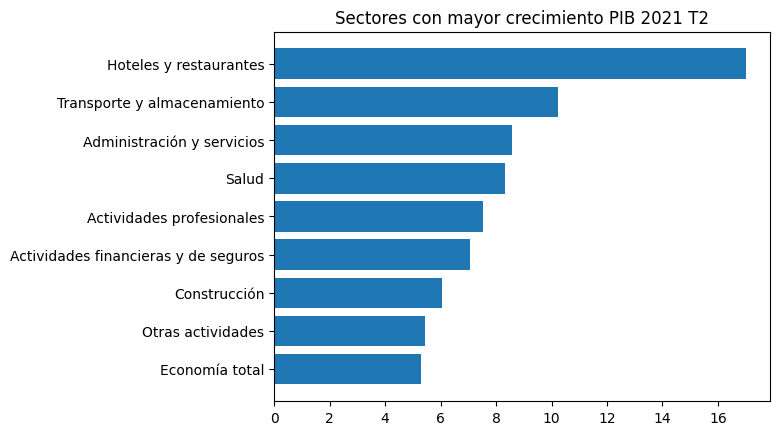

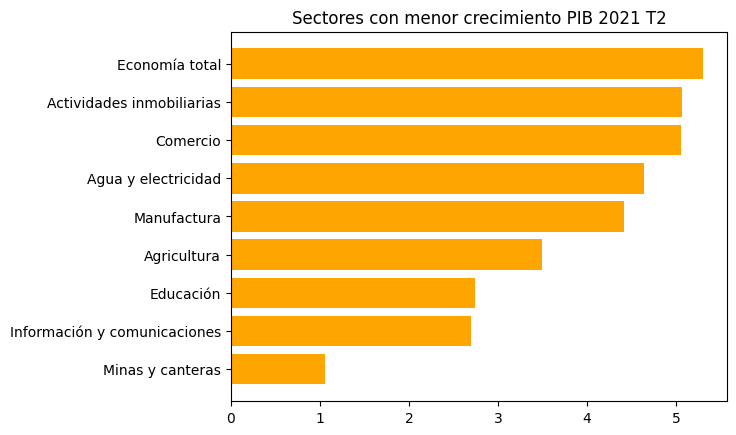

In [26]:
# Rcurso opcional de referencia
# https://matplotlib.org/3.3.3/gallery/lines_bars_and_markers/barh.html

plt.barh(
    [sector for sector in highest_growing_sectors], 
    [growing_rates[sector] for sector in highest_growing_sectors],

    )
plt.gca().invert_yaxis() # small trick..
plt.title("Sectores con mayor crecimiento PIB 2021 T2")
plt.show()

# plt.barh(
#     [sector for sector in least_growing_sectors], 
#     [growing_rates[sector] for sector in least_growing_sectors],
#     color="red"
#     )

plt.barh(
    [sector for sector in least_growing_sectors if growing_rates[sector] <= 0], 
    [growing_rates[sector] for sector in least_growing_sectors if growing_rates[sector] <= 0],
    color="red"
    )

plt.barh(
    [sector for sector in least_growing_sectors if growing_rates[sector] > 0], 
    [growing_rates[sector] for sector in least_growing_sectors if growing_rates[sector] > 0],
    color="orange"
    )

plt.title("Sectores con menor crecimiento PIB 2021 T2")
plt.show()

In [27]:
highest_growing_sectors_csv = "PIB-Sectores-Mayor-Crecimiento.csv"
pd.DataFrame({"Sector" : [sector for sector in highest_growing_sectors[::-1]], 
              "Crecimiento interanual (acum. 4 trimestres)" : [growing_rates[sector] for sector in highest_growing_sectors[::-1]]}
             ).to_csv(highest_growing_sectors_csv, index=False)

In [28]:
bucket_path = 'ufm-market-trends/guatemala/actividad-economica/PIB-Sectores-Mayor-Crecimiento'
csv_file = highest_growing_sectors_csv

!gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
!gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}  
!gsutil cat gs://{bucket_path}/{csv_file}

Copying file://PIB-Sectores-Mayor-Crecimiento.csv [Content-Type=text/csv]...
/ [1 files][  409.0 B/  409.0 B]                                                
Operation completed over 1 objects/409.0 B.                                      
Copying gs://ufm-market-trends/guatemala/actividad-economica/PIB-Sectores-Mayor-Crecimiento/PIB-Sectores-Mayor-Crecimiento.csv [Content-Type=text/csv]...
/ [1 files][  409.0 B/  409.0 B]                                                
Operation completed over 1 objects/409.0 B.                                      
Sector,Crecimiento interanual (acum. 4 trimestres)
Economía total,5.306286877311614
Otras actividades,5.440266443001008
Construcción,6.036152041178673
Actividades financieras y de seguros,7.048971882156145
Actividades profesionales,7.544912215409891
Salud,8.326611067537403
Administración y servicios,8.568141122272593
Transporte y almacenamiento,10.23607801863406
Hoteles y restaurantes,17.02832487266895


In [29]:
least_growing_sectors_csv = "PIB-Sectores-Menor-Crecimiento.csv"
pd.DataFrame({"Sector" : [sector for sector in least_growing_sectors[::-1]], 
              "Crecimiento interanual (acum. 4 trimestres)" : [growing_rates[sector] for sector in least_growing_sectors[::-1]]}
             ).to_csv(least_growing_sectors_csv, index=False)

In [30]:
bucket_path = 'ufm-market-trends/guatemala/actividad-economica/PIB-Sectores-Menor-Crecimiento'
csv_file = least_growing_sectors_csv

!gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
!gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}  
!gsutil cat gs://{bucket_path}/{csv_file}

Copying file://PIB-Sectores-Menor-Crecimiento.csv [Content-Type=text/csv]...
/ [1 files][  368.0 B/  368.0 B]                                                
Operation completed over 1 objects/368.0 B.                                      
Copying gs://ufm-market-trends/guatemala/actividad-economica/PIB-Sectores-Menor-Crecimiento/PIB-Sectores-Menor-Crecimiento.csv [Content-Type=text/csv]...
/ [1 files][  368.0 B/  368.0 B]                                                
Operation completed over 1 objects/368.0 B.                                      
Sector,Crecimiento interanual (acum. 4 trimestres)
Economía total,5.306286877311614
Actividades inmobiliarias,5.07199530876941
Comercio,5.051013004160603
Agua y electricidad,4.644092515909044
Manufactura,4.4115673910609905
Agricultura,3.493401078074701
Educación,2.7453669078240743
Información y comunicaciones,2.695819866271708
Minas y canteras,1.0558473284052168


## IMAE 

IMAE más reciente: 2022-8


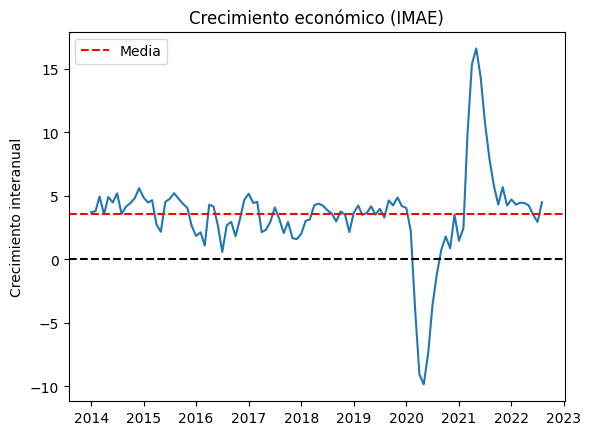

In [31]:
# https://www.interviewqs.com/ddi-code-snippets/extract-month-year-pandas
imae_data_url = "https://www.banguat.gob.gt/sites/default/files/banguat/Publica/IMAE/2013/Cuadros_y_graficas_IMAE.xlsx"

imae_dataframe = pd.read_excel(imae_data_url, sheet_name=1,
                               skiprows=7)

imae_dataframe = imae_dataframe.iloc[:,:3]

IMAE_YEARLY_VARIATION = "IMAE variación interanual"
imae_dataframe.columns = ['date', 'IMAE', IMAE_YEARLY_VARIATION]

months_amount = 0
for i in range(len(imae_dataframe['IMAE'])):
  if not pd.isna(imae_dataframe['IMAE'][i]):
    months_amount += 1

# -1 por el pie de página
print(f'IMAE más reciente: {2013 + (months_amount)//12}-{months_amount%12 - 1}')

imae_dataframe = imae_dataframe[:months_amount-1]  

imae_dataframe['date'] = pd.to_datetime(imae_dataframe['date'])

imae_dataframe.insert(loc=1, column="month", 
                      value=imae_dataframe['date'].dt.to_period('M'), 
                      allow_duplicates=True)

imae_dataframe[IMAE_YEARLY_VARIATION] = imae_dataframe[IMAE_YEARLY_VARIATION]#/100


plt.plot(imae_dataframe['date'],
         imae_dataframe[IMAE_YEARLY_VARIATION])

IMAE_mean = np.mean(imae_dataframe[IMAE_YEARLY_VARIATION]) 
imae_dataframe['Media desde 2014'] = IMAE_mean
plt.axhline(IMAE_mean,
            color='r', linestyle='dashed', label='Media')
plt.ylabel('Crecimiento interanual')
plt.title('Crecimiento económico (IMAE)')
plt.axhline(0,
            color='black', linestyle='dashed')
plt.legend()
plt.show()

In [32]:
imae_csv = "IMAE.csv"
imae_dataframe[12:].to_csv(imae_csv, index=False)

In [33]:
bucket_path = 'ufm-market-trends/guatemala/actividad-economica/IMAE'
csv_file = imae_csv

!gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
!gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}  
!gsutil cat gs://{bucket_path}/{csv_file}

Copying file://IMAE.csv [Content-Type=text/csv]...
/ [1 files][  7.6 KiB/  7.6 KiB]                                                
Operation completed over 1 objects/7.6 KiB.                                      
Copying gs://ufm-market-trends/guatemala/actividad-economica/IMAE/IMAE.csv [Content-Type=text/csv]...
/ [1 files][  7.6 KiB/  7.6 KiB]                                                
Operation completed over 1 objects/7.6 KiB.                                      
date,month,IMAE,IMAE variación interanual,Media desde 2014
2014-01-01,2014-01,102.74952132791037,3.7112346866285293,3.569312916872092
2014-02-01,2014-02,102.56879007445305,3.801671310424709,3.569312916872092
2014-03-01,2014-03,106.75557952021751,4.952095014522115,3.569312916872092
2014-04-01,2014-04,104.79563945457397,3.555052441070245,3.569312916872092
2014-05-01,2014-05,104.39892846844491,4.918747312909801,3.569312916872092
2014-06-01,2014-06,101.0508509652544,4.480379077395142,3.569312916872092
2014-07-01,2014-07